In [69]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]

In [70]:
import tensorflow as tf

In [71]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

In [72]:
train = tf.keras.utils.image_dataset_from_directory(
    "images",
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  "images",
  subset="validation",
    **args
)

Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [73]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [74]:
test

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [75]:
first=test.take(1)
first

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [76]:
images,labels=list(first)[0]

In [143]:
first_image=images[2]


In [78]:
first_image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 51.49553 ,  67.97209 ,  27.542404],
        [ 50.38333 ,  67.38333 ,  24.158981],
        [ 56.483505,  73.57248 ,  28.305557],
        ...,
        [ 58.332245,  63.332245,  43.332245],
        [ 50.66211 ,  58.66211 ,  37.66211 ],
        [ 50.523438,  58.523438,  37.523438]],

       [[ 55.277344,  72.11888 ,  29.929688],
        [ 57.458984,  74.458984,  30.029297],
        [ 65.299484,  82.6823  ,  36.53386 ],
        ...,
        [ 55.059235,  60.059235,  40.059235],
        [ 52.42656 ,  60.42656 ,  39.42656 ],
        [ 50.85573 ,  58.85573 ,  37.85573 ]],

       [[ 70.31337 ,  87.47548 ,  41.83464 ],
        [ 69.389984,  86.912125,  40.021484],
        [ 70.18599 ,  88.18599 ,  39.096146],
        ...,
        [ 55.189896,  60.189896,  40.189896],
        [ 55.160797,  63.160797,  42.160797],
        [ 50.9924  ,  58.9924  ,  37.9924  ]],

       ...,

       [[179.34528 , 172.34528 , 164.34528 ],
        [196.

In [79]:
first_image[:3,:3,1] #blue 

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[67.97209 , 67.38333 , 73.57248 ],
       [72.11888 , 74.458984, 82.6823  ],
       [87.47548 , 86.912125, 88.18599 ]], dtype=float32)>

In [80]:
first_image[:3,:3,2] #green 

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[27.542404, 24.158981, 28.305557],
       [29.929688, 30.029297, 36.53386 ],
       [41.83464 , 40.021484, 39.096146]], dtype=float32)>

In [81]:
first_image[:3,:3,0] #red pixel 

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[51.49553 , 50.38333 , 56.483505],
       [55.277344, 57.458984, 65.299484],
       [70.31337 , 69.389984, 70.18599 ]], dtype=float32)>

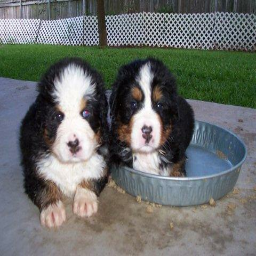

In [144]:
from PIL import Image
Image.fromarray(first_image.numpy().astype("uint8"))

In [83]:
labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

In [84]:
train=train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [85]:
train


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [86]:
test

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [87]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [96]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(256,256,3)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(len(breeds))
])

In [97]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuray"])

In [102]:

history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

Epoch 1/5


TypeError: 'NoneType' object is not callable

In [100]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 flatten_4 (Flatten)         (None, 1048576)           0         
                                                                 
 dense_8 (Dense)             (None, 128)               134217856 
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134,218,949
Trainable params: 134,218,949
Non-trainable params: 0
_________________________________________________________________


In [101]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

NameError: name 'history' is not defined

In [103]:
def train_model(network, epochs=5):
    model = Sequential(network)

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [107]:
network = [
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
]

history_df, model = train_model(network)

Epoch 1/5
24/24 [==============================] - 32s 1s/step - loss: 9.9458 - accuracy: 0.2078 - val_loss: 1.5978 - val_accuracy: 0.2919
Epoch 2/5
24/24 [==============================] - 31s 1s/step - loss: 1.5810 - accuracy: 0.3306 - val_loss: 1.5419 - val_accuracy: 0.3081
Epoch 3/5
24/24 [==============================] - 32s 1s/step - loss: 1.3701 - accuracy: 0.4642 - val_loss: 1.7167 - val_accuracy: 0.2757
Epoch 4/5
24/24 [==============================] - 31s 1s/step - loss: 0.9042 - accuracy: 0.6856 - val_loss: 1.8767 - val_accuracy: 0.2486
Epoch 5/5
24/24 [==============================] - 31s 1s/step - loss: 0.5453 - accuracy: 0.8354 - val_loss: 3.2193 - val_accuracy: 0.2973


<AxesSubplot:>

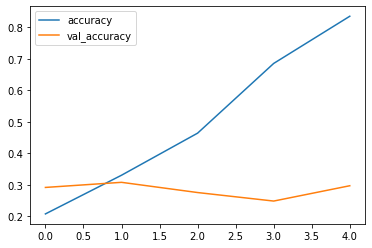

In [108]:
history_df[["accuracy", "val_accuracy"]].plot() # without maxpooling2D

<AxesSubplot:>

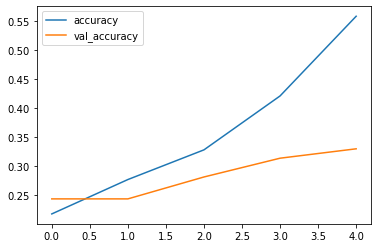

In [105]:
history_df[["accuracy", "val_accuracy"]].plot()

In [110]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal",seed=1),
    layers.RandomRotation(.2,seed=1),
    layers.RandomZoom(.2,seed=1)
])

In [111]:
full_network=[data_augmentation]+network

In [112]:
history_df,model=train_model(full_network)

Epoch 1/5
24/24 [==============================] - 32s 1s/step - loss: 1.6933 - accuracy: 0.2416 - val_loss: 1.6000 - val_accuracy: 0.2757
Epoch 2/5
24/24 [==============================] - 33s 1s/step - loss: 1.5998 - accuracy: 0.2497 - val_loss: 1.5907 - val_accuracy: 0.2649
Epoch 3/5
24/24 [==============================] - 33s 1s/step - loss: 1.5943 - accuracy: 0.2780 - val_loss: 1.5430 - val_accuracy: 0.3189
Epoch 4/5
24/24 [==============================] - 33s 1s/step - loss: 1.5813 - accuracy: 0.2834 - val_loss: 1.5420 - val_accuracy: 0.3135
Epoch 5/5
24/24 [==============================] - 33s 1s/step - loss: 1.5801 - accuracy: 0.2686 - val_loss: 1.5824 - val_accuracy: 0.2919


<AxesSubplot:>

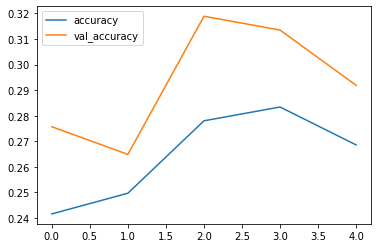

In [113]:


history_df[["accuracy", "val_accuracy"]].plot()

In [120]:
preds=model.predict(test)

In [121]:
import numpy as np
predicted_class=np.argmax(preds,axis=1)

In [122]:
predicted_class

array([4, 1, 0, 3, 1, 2, 3, 3, 0, 0, 1, 4, 1, 0, 3, 0, 1, 0, 1, 0, 1, 4,
       4, 0, 3, 1, 0, 4, 4, 4, 4, 3, 0, 2, 0, 4, 0, 2, 0, 0, 1, 4, 0, 0,
       0, 0, 2, 3, 0, 0, 2, 4, 1, 2, 2, 0, 0, 4, 0, 0, 0, 0, 1, 1, 4, 0,
       4, 0, 4, 4, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 4, 1, 2, 3, 4,
       0, 1, 3, 0, 3, 0, 3, 0, 0, 1, 0, 0, 1, 4, 0, 3, 1, 0, 1, 4, 4, 4,
       2, 0, 1, 0, 3, 0, 0, 2, 0, 4, 0, 0, 0, 1, 4, 3, 2, 3, 3, 0, 0, 0,
       2, 1, 4, 3, 0, 0, 3, 3, 4, 4, 3, 1, 0, 2, 0, 0, 4, 0, 0, 1, 4, 0,
       4, 2, 0, 4, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       0, 4, 4, 4, 0, 0, 3, 0, 1], dtype=int64)

In [123]:
actual_labels=np.concatenate([y for x,y in test],axis=0)


In [124]:
actual_labels

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0.

In [126]:
actual_class=np.argmax(actual_labels,axis=1)

In [127]:
actual_class

array([2, 1, 0, 0, 2, 0, 0, 4, 1, 3, 1, 1, 1, 3, 4, 1, 2, 2, 1, 0, 2, 2,
       4, 0, 1, 1, 1, 4, 4, 0, 4, 1, 1, 1, 0, 3, 0, 3, 4, 0, 2, 2, 0, 1,
       3, 1, 1, 4, 3, 0, 1, 4, 3, 1, 2, 4, 0, 0, 3, 1, 3, 3, 1, 1, 4, 4,
       0, 0, 1, 0, 4, 3, 1, 4, 3, 4, 3, 3, 1, 1, 1, 2, 2, 4, 2, 2, 2, 3,
       0, 0, 3, 4, 3, 3, 3, 4, 2, 0, 0, 3, 4, 3, 2, 1, 1, 1, 4, 4, 3, 0,
       2, 3, 4, 2, 0, 0, 2, 1, 3, 3, 2, 2, 4, 1, 4, 3, 3, 4, 1, 0, 3, 4,
       1, 3, 1, 0, 0, 4, 3, 4, 0, 0, 1, 3, 3, 1, 4, 1, 4, 0, 4, 2, 4, 4,
       0, 3, 1, 4, 3, 0, 4, 2, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 4, 1,
       3, 4, 0, 1, 0, 2, 4, 4, 1], dtype=int64)

In [134]:
import itertools

actual_image=[x.numpy().astype("uint8") for x,y in test]
actual_image=list(itertools.chain.from_iterable(actual_image))

In [135]:
actual_image = [Image.fromarray(a) for a in actual_image]

In [137]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"])
pred_df

,prediction,actual,image
0,4,2,<PIL.Image.Image image mode=RGB size=256x256 a...
1,1,1,<PIL.Image.Image image mode=RGB size=256x256 a...
2,0,0,<PIL.Image.Image image mode=RGB size=256x256 a...
3,3,0,<PIL.Image.Image image mode=RGB size=256x256 a...
4,1,2,<PIL.Image.Image image mode=RGB size=256x256 a...
...,...,...,...
180,0,0,<PIL.Image.Image image mode=RGB size=256x256 a...
181,0,2,<PIL.Image.Image image mode=RGB size=256x256 a...
182,3,4,<PIL.Image.Image image mode=RGB size=256x256 a...
183,0,4,<PIL.Image.Image image mode=RGB size=256x256 a...


In [138]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: breeds[x])
pred_df["actual"] = pred_df["actual"].apply(lambda x: breeds[x])

In [141]:
pred_df.head()

,prediction,actual,image
0,siberian_husky,doberman,<PIL.Image.Image image mode=RGB size=256x256 a...
1,bernese_mountain_dog,bernese_mountain_dog,<PIL.Image.Image image mode=RGB size=256x256 a...
2,beagle,beagle,<PIL.Image.Image image mode=RGB size=256x256 a...
3,labrador_retriever,beagle,<PIL.Image.Image image mode=RGB size=256x256 a...
4,bernese_mountain_dog,doberman,<PIL.Image.Image image mode=RGB size=256x256 a...


,prediction,actual,image
0,siberian_husky,doberman,
1,bernese_mountain_dog,bernese_mountain_dog,
2,beagle,beagle,
3,labrador_retriever,beagle,
4,bernese_mountain_dog,doberman,
5,doberman,beagle,
6,labrador_retriever,beagle,
7,labrador_retriever,siberian_husky,
8,beagle,bernese_mountain_dog,
9,beagle,labrador_retriever,

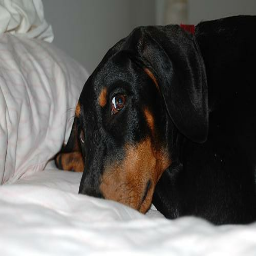
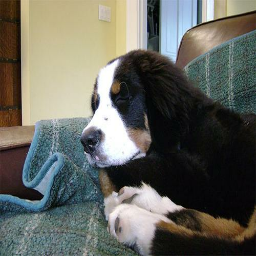
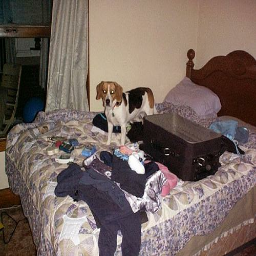
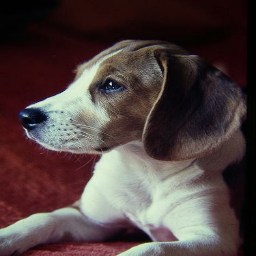
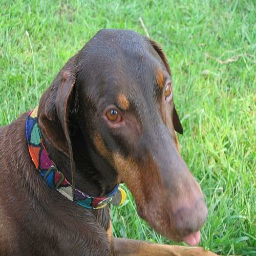
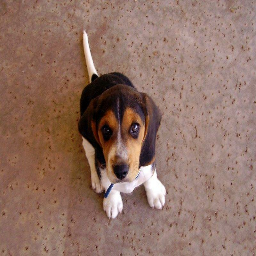
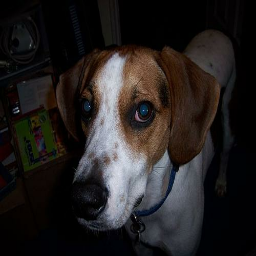
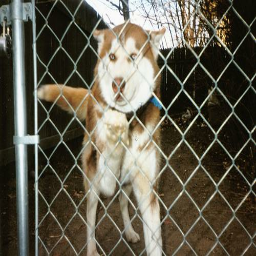
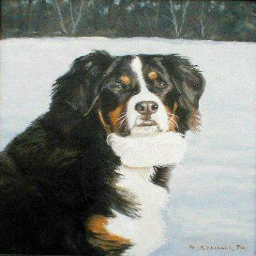
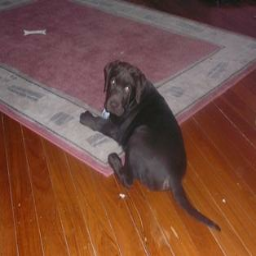

In [142]:
import base64
import io

def image_formatter(img):
    with io.BytesIO() as buffer:
        img.save(buffer, 'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'

pred_df.head(10).style.format({'image': image_formatter})